In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
from scipy import stats
from sklearn.preprocessing import StandardScaler
from itertools import chain

In [2]:
daily_discharge = pd.read_excel("./data/KRB_Discharge_Stations/Discharge/Vijayawada_SUMQH.xls")

In [3]:
daily_discharge.head()

,Date,Gauge,Water Level,Discharge,Observed_Computed,Top Width,Wetted Perimeter,Radius,Velocity,Manning,Area,Slope,Max Velocity,Remarks
0,1965-01-01,1.78,9.932,77.211,O,522.0,522.0,0.808,0.183,0.047,422.0,0.0001,NaN,NaN
1,1965-01-02,1.66,9.812,52.310,O,512.0,512.0,0.689,0.148,0.053,353.0,0.0001,NaN,NaN
2,1965-01-03,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1965-01-04,1.74,9.892,61.625,O,522.0,522.0,0.763,0.155,0.054,398.5,0.0001,NaN,NaN
4,1965-01-05,1.70,9.852,49.060,O,514.0,514.0,0.730,0.131,0.062,375.0,0.0001,NaN,NaN


In [4]:
daily_discharge.isna().sum()

Date                     0
Gauge                   27
Water Level             27
Discharge               30
Observed_Computed        0
Top Width             8239
Wetted Perimeter      7361
Radius                7361
Velocity              7275
Manning               8199
Area                  7275
Slope                 8103
Max Velocity         10205
Remarks              18413
dtype: int64

In [6]:
daily_discharge.shape

(18413, 14)

In [7]:
daily_discharge = daily_discharge.set_index('Date')

array([<AxesSubplot:xlabel='Date'>], dtype=object)

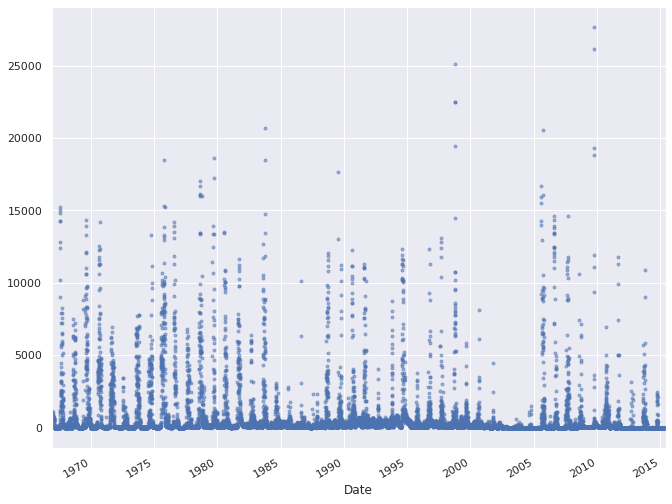

In [13]:
#xticks = pd.date_range(start="1980-01-01",end="2004-12-31", freq='Y')
#daily_discharge['Discharge'].plot(linewidth=1.0, ylim=(0,2.5), xticks=xticks);
daily_discharge.loc['1966-12':,'Discharge'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)


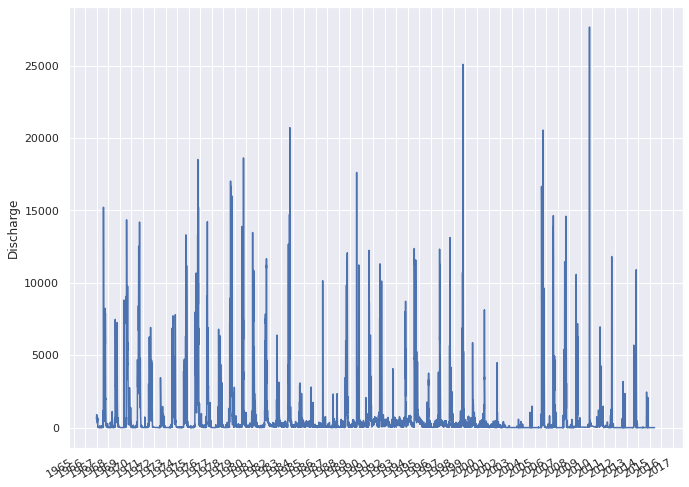

In [16]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(11, 9))
ax.plot(daily_discharge.loc['1967-01':, 'Discharge'])
ax.set_ylabel('Discharge')
# Set x-axis major ticks to weekly interval, on Mondays
datemin = np.datetime64(daily_discharge.index[0], 'Y')
datemax = np.datetime64(daily_discharge.index[5000], 'Y') + np.timedelta64(1, 'Y')
#ax.set_xlim(datemin, datemax)
#ax.set_ylim(0, 2.5)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

In [17]:
daily_discharge['Year'] = daily_discharge.index.year
daily_discharge['Month'] = daily_discharge.index.month

Text(0.5, 1.0, 'Discharge')

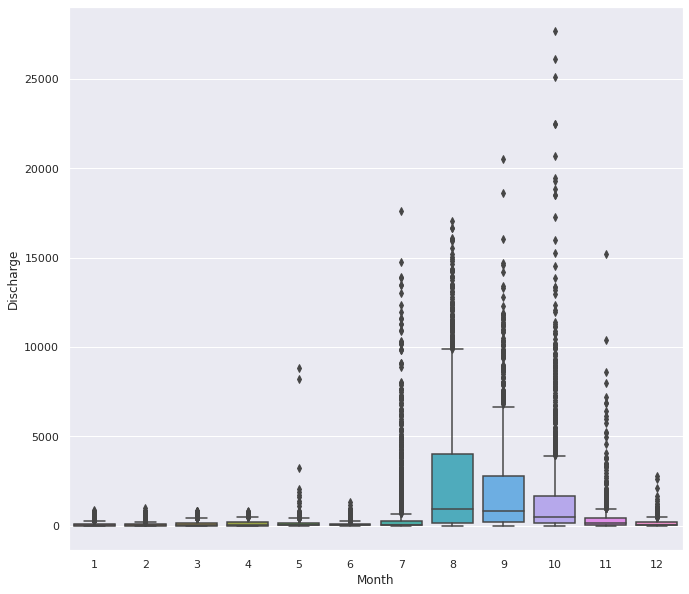

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(11, 10), sharex=True)
sns.boxplot(data=daily_discharge, x='Month', y='Discharge', ax=axes)
ax.set_title('Discharge')

In [20]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Gauge', 'Water Level', 'Discharge', 'Observed_Computed', 'Remarks']
# Resample to weekly frequency, aggregating with mean
discharge_weekly_mean = daily_discharge[data_columns].resample('W').mean()
discharge_monthly_mean = daily_discharge[data_columns].resample('M').mean()

### Resampling

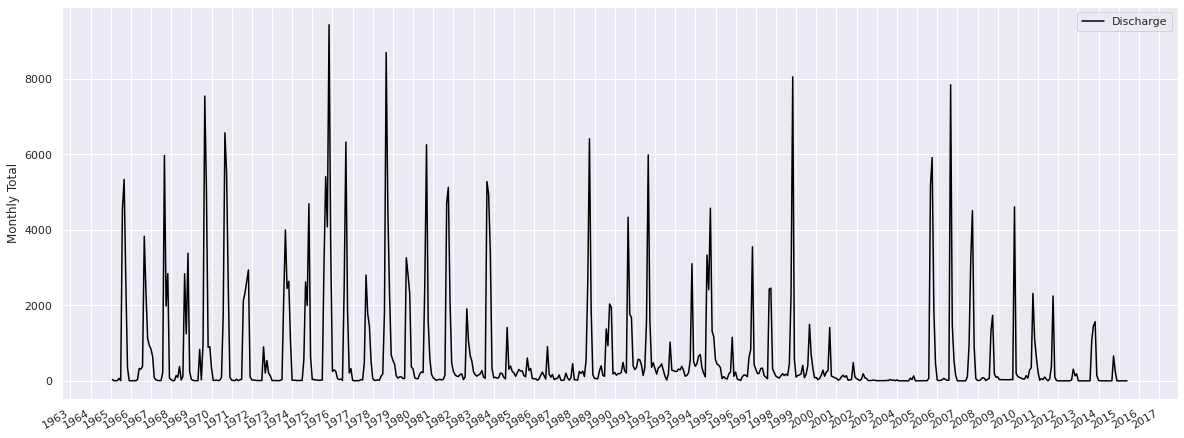

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
ax.plot(discharge_monthly_mean['Discharge'], color='black', label='Discharge')
#discharge_monthly['Discharge'].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_ylabel('Monthly Total');
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

### Rolling windows

**Weekly and yearly rolling window**

In [22]:
discharge_7d = daily_discharge[data_columns].rolling(7, center=True).mean()
discharge_30d = daily_discharge[data_columns].rolling('30D').mean()
discharge_365d = daily_discharge[data_columns].rolling(window=365, center=True, min_periods=360).mean()

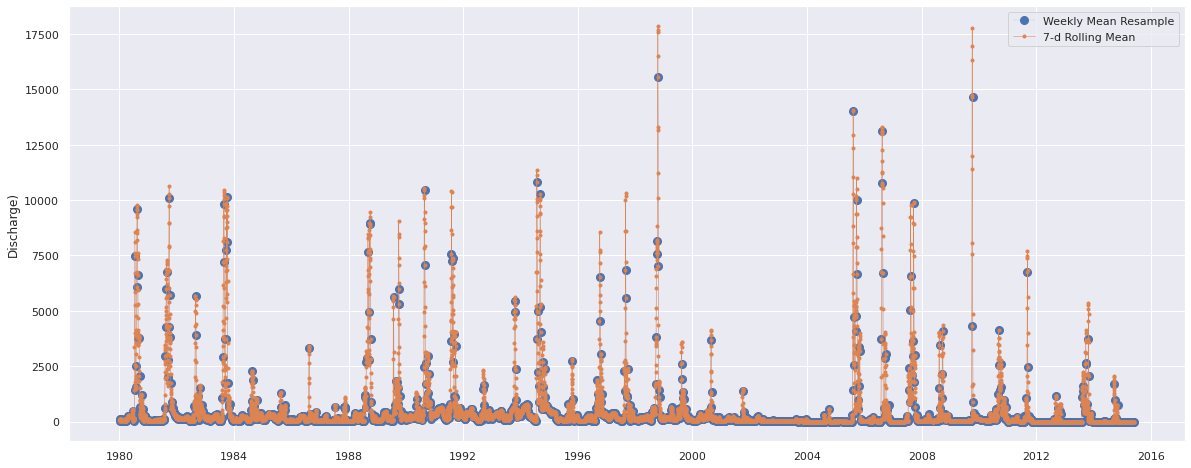

In [24]:
# Start and end of the date range to extract
start, end = '1980-01','1990-02'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
#ax.plot(daily_discharge.loc[start:end, 'Discharge'],
#marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(discharge_weekly_mean.loc[start:, 'Discharge'],
marker='o', markersize=8, linestyle='-', linewidth=0.1, label='Weekly Mean Resample')
ax.plot(discharge_7d.loc[start:, 'Discharge'],
marker='.', linestyle='-', linewidth=0.5, label='7-d Rolling Mean')
ax.set_ylabel('Discharge)')
ax.legend();

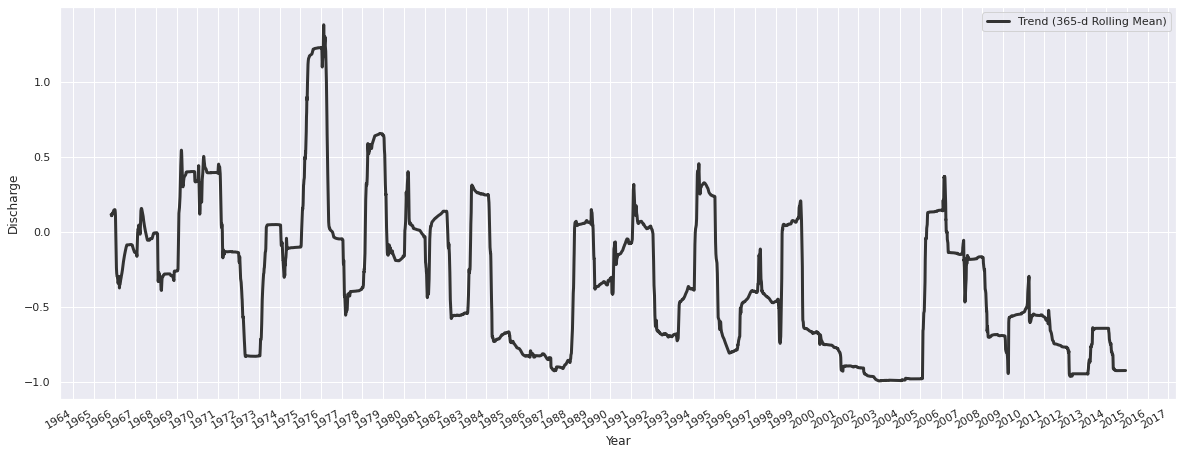

In [25]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
#ax.plot(daily_discharge['Discharge'], marker='.', markersize=2, color='0.6',
#linestyle='None', label='Daily')
#ax.plot(discharge_7d['Discharge'], linewidth=2, label='7-d Rolling Mean')
ax.plot((discharge_365d['Discharge']-999)*0.001, color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge')
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

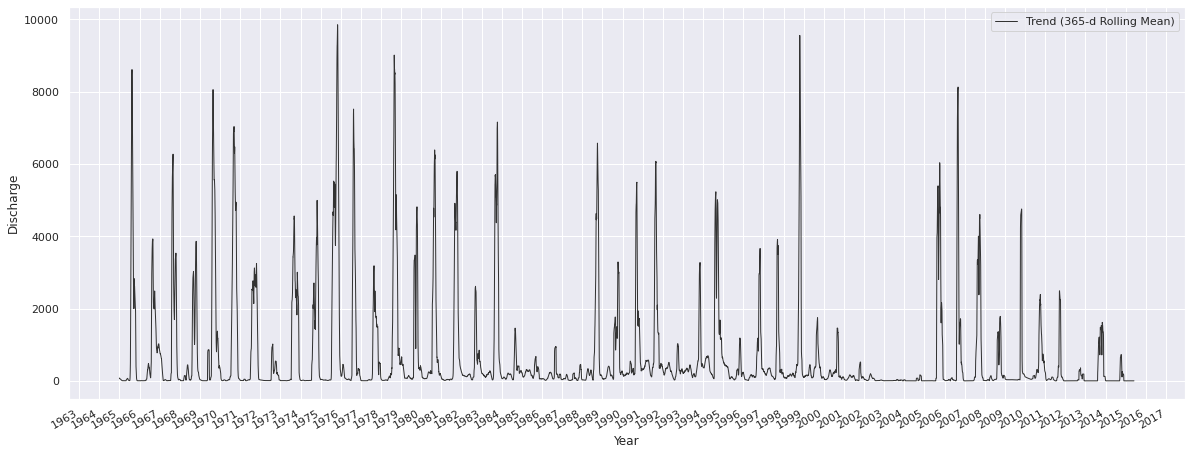

In [26]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
#ax.plot(daily_discharge['Discharge'], marker='.', markersize=2, color='0.6',
#linestyle='None', label='Daily')
#ax.plot(discharge_7d['Discharge'], linewidth=2, label='7-d Rolling Mean')
ax.plot(discharge_30d['Discharge'], color='0.2', linewidth=1,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge')
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()